In [25]:
#importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
requests.__version__
from config import weather_api_key
from datetime import datetime

In [26]:
# creat a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size =1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [27]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [28]:
# add the latitudes and the longitudes to a list
coordinates = list(lat_lngs)

In [29]:
# use the tuple fucntion to display the latitude and longitude combiniations
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    # if the city is unique then we will add it to the cities list
    if city not in cities:
            cities.append(city)

In [1]:
# create an empy list to hold the weather data
city_data = []
# print the beginning of the loggin
print("Beginning Data Retrieval     ")
print("------------------------------")
# create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
------------------------------


NameError: name 'req' is not defined

In [31]:
# loop through all the cities in our list
for i, city in enumerate(cities):
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    #print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # add 1 to the record count.
    
    record_count += 1
    
    
    # ran an api request for each of the cities
    try:
        # pasrse the JSON and retrieve data.
        req = requests.get(city_url)
        if req.status_code == 200:
            city_weather = req.json()

            # parse out the needed data
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather ["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            # conver the date to ISO standard
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
            # append the city information into city_data list
            city_data.append({"City": city.title(),
                             "Lat": city_lat,
                             "Lng": city_lng,
                             "Max Temp" : city_max_temp,
                             "Humidity": city_humidity,
                              "Cloudiness" : city_clouds,
                              "Wind Speed" : city_wind,
                              "Country" : city_country,
                              "Date" : city_date})
    # if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
print("----------------------------")
print("Data Retrieval Complete")

Processing Record 1 of Set 2 | tuktoyaktuk
Processing Record 1 of Set 3 | kavieng
Processing Record 1 of Set 4 | kyzyl-suu
Processing Record 1 of Set 5 | pierre
Processing Record 1 of Set 6 | dubenskiy
Processing Record 1 of Set 7 | haverfordwest
Processing Record 1 of Set 8 | novyy urengoy
Processing Record 1 of Set 9 | nangomba
Processing Record 1 of Set 10 | geraldton
Processing Record 1 of Set 11 | sembakung
Processing Record 1 of Set 12 | richards bay
Processing Record 1 of Set 13 | shaartuz
Processing Record 1 of Set 14 | cuiluan
----------------------------
Data Retrieval Complete


In [32]:
# convert the array of dictionaries to a pd df
city_data_df = pd.DataFrame(city_data)
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [45]:
city_data_df = city_data_df[["City","Cloudiness","Country","Date","Humidity", 
                            "Lat", "Lng","Max Temp", "Wind Speed"]]

In [46]:
#create the output file
output_data_file = "weather_data/cities.csv"
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [48]:
# extract relevant fields from the data frame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
cloudiness = city_data_df["Cloudiness"]
humidity = city_data_df["Humidity"]
wind_speed = city_data_df["Wind Speed"]

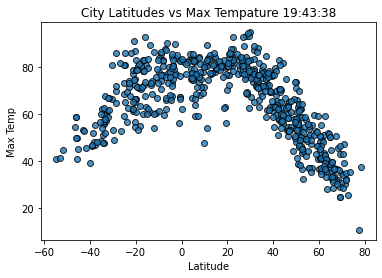

In [49]:
# scatter plot with
import time

#build the scatter plot for lat vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidth=1, marker="o",
           alpha=0.8, label = "Cities")

plt.title(f"City Latitudes vs Max Tempature " + time.strftime("%X"))
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.savefig("weather_data/Fig2.png")
plt.show()

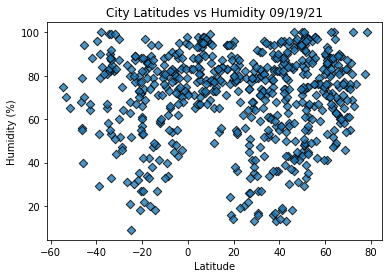

In [66]:
# scatter plot with
import time

#build the scatter plot for lat vs humidity
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidth=1, marker="D",
           alpha=0.8, label = "Cities")

plt.title(f"City Latitudes vs Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("weather_data/Fig3.png")
plt.show()

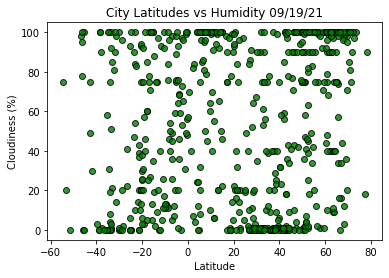

In [67]:
# scatter plot with
import time

#build the scatter plot for lat vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidth=1, marker="o", c = "green",
           alpha=0.8, label = "Cities")

plt.title(f"City Latitudes vs Humidity " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("weather_data/Fig4.png")
plt.show()

In [69]:
from scipy.stats import linregress

#CREATING A FUNCTION HECK YEAH
# lenear regression and plot a gregression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # calculate the regression like "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # get the equation of the lin.
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept, 2))
    # create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r")
    # annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [84]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

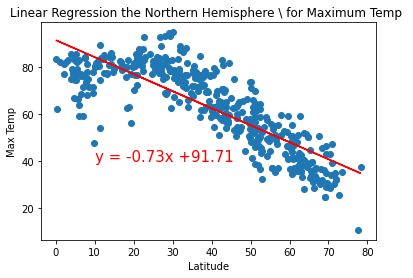

In [85]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# calling the fucntion AHHHHHHH YEAHHHH
plot_linear_regression(x_values, y_values, "Linear Regression the Northern Hemisphere \ for Maximum Temp "
                      , "Max Temp", (10,40))

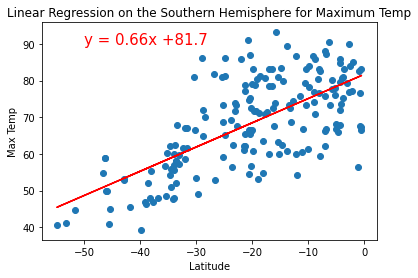

In [87]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# plotting max temp is southern hemisphere
plot_linear_regression( x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for Maximum Temp", "Max Temp", (-50,90))

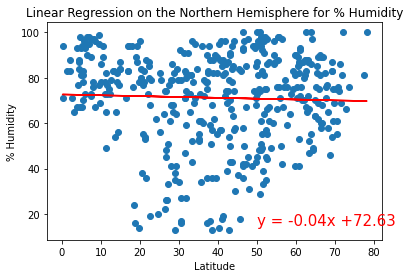

In [102]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# plotting correlation between humidty and lat NH
plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Northern Hemisphere for % Humidity",
                      "% Humidity", (50,15))

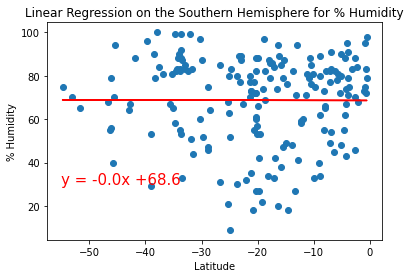

In [108]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# plotting correlation between humidty and lat NH
plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Southern Hemisphere for % Humidity",
                      "% Humidity", (-55,30))

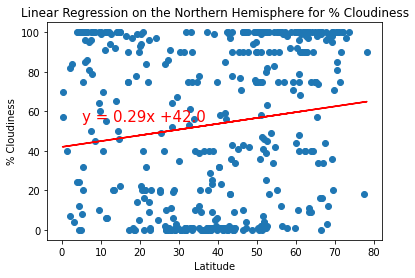

In [118]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# plotting correlation between humidty and lat NH
plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Northern Hemisphere for % Cloudiness",
                      "% Cloudiness", (5,55))

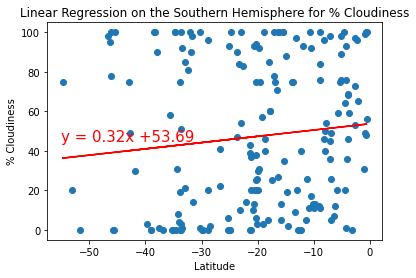

In [124]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# plotting correlation between humidty and lat NH
plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Southern Hemisphere for % Cloudiness",
                      "% Cloudiness", (-55, 45))

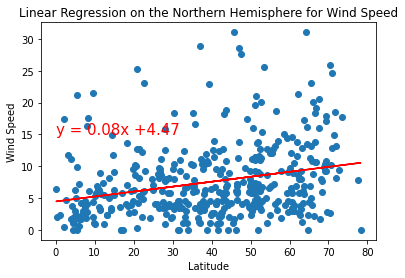

In [131]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# plotting correlation between humidty and lat NH
plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Northern Hemisphere for Wind Speed",
                      "Wind Speed", (0,15))

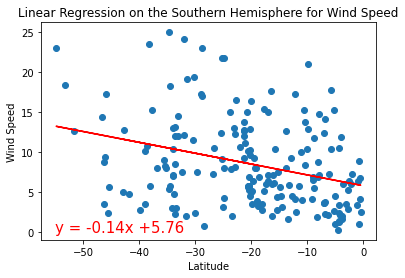

In [134]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# plotting correlation between humidty and lat NH
plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Southern Hemisphere for Wind Speed",
                      "Wind Speed", (-55,0))